# Exercise 17

### c)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Y = pd.read_csv("soccer.csv")

def log(p):       # help-function to calculate log expression for entropy
    if p == 0:
        return 0
    return p*np.log2(p)

def H_Y(Y, dt):  # calculate entropy of dataset Y on decision target dt
    n = len(Y)
    p = len(Y[Y[dt] == True])/n     # propability of decision target = True
    return -(log(p) + log(1-p))     

def H_YX(Y, dt, subspace1, subspace2):  # entropy of Y under condition X, subspaces: seperation of Y according to X
    n = len(Y)
    n1 = len(subspace1)
    n2 = n - n1
    
    # propabilities 
    p11, p12, p21, p22 = [0,0,0,0]
    
    if n1 != 0: # avoid devision by 0
        p11 = len(subspace1[subspace1[dt] == True])/n1
        p12 = len(subspace1[subspace1[dt] == False])/n1
    
    if n2 != 0:
        p21 = len(subspace2[subspace2[dt] == True])/n2
        p22 = len(subspace2[subspace2[dt] == False])/n2
    
    return -n1/n*(log(p11) + log(p12)) - n2/n*(log(p21) + log(p22))

# information-gain of cardinal attribute
def IG_cardinal(Y, at, cut, dt):     # at: attribute, dt: decision target, cut: value of cut
    h_y = H_Y(Y, dt)
    n = len(Y)
    
    # dividing Y in 2 subspaces
    subspace1 = Y[Y[at] <= cut]
    subspace2 = Y[Y[at] > cut]
    
    h_yx = H_YX(Y, dt, subspace1, subspace2)

    return h_y - h_yx

# information-gain of nominal attribute
def IG_nominal(Y, at, dt, cut):
    h_y = H_Y(Y, dt)
    n = len(Y)
    
    a = np.zeros(len(Y), dtype = bool)

    for i in range(len(Y)):
        if Y["weather_forecast"][i] in cut:
            a[i] = True 
    
    subspace1 = Y[a]
    subspace2 = Y[a == False]
    
    h_yx = H_YX(Y, dt, subspace1, subspace2)
    
    return h_y - h_yx

print(IG_nominal(Y, "weather_forecast", "soccer", ["rainy"]))
print(IG_nominal(Y, "weather_forecast", "soccer", ["cloudy"]))
print(IG_nominal(Y, "weather_forecast", "soccer", ["sunny"]))

0.003184853044648994
0.22600024438491684
0.10224356360985076


Text(0.5, 1.0, 'weather forecast')

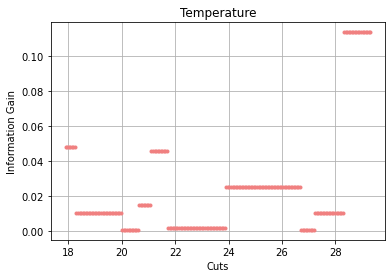

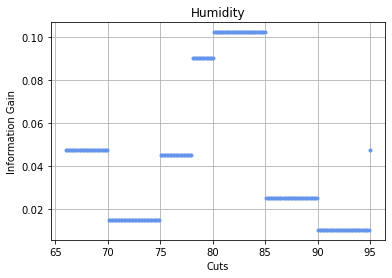

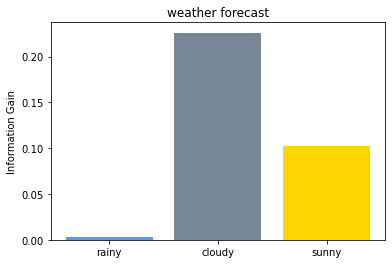

In [2]:
# plots    
  
# plot for attribute temperature    
fig, axs = plt.subplots()

cuts = np.linspace(17.9, 29.3, 200)

for i in range(len(cuts)):
    axs.plot(cuts[i], IG_cardinal(Y, "temperature", cuts[i], "soccer"), marker = ".", color = "lightcoral")

plt.grid()  
axs.set_xlabel("Cuts")
axs.set_ylabel("Information Gain")  
axs.set_title("Temperature")
 

# plot for attribute humidity    
fig2, axs2 = plt.subplots()
    
cuts2 = np.linspace(66, 95, 200)

for i in range(len(cuts2)):
    axs2.plot(cuts2[i], IG_cardinal(Y, "humidity", cuts2[i], "soccer"), marker = ".", color = "cornflowerblue")
    
plt.grid()  
axs2.set_xlabel("Cuts")
axs2.set_ylabel("Information Gain")   
axs2.set_title("Humidity")

# plot for weather forecast
fig2, axs2 = plt.subplots()

axs2.bar(1, IG_nominal(Y, "weather_forecast", "soccer", ["rainy"]), color = "cornflowerblue")
axs2.bar(2, IG_nominal(Y, "weather_forecast", "soccer", ["cloudy"]), color = "lightslategrey")
axs2.bar(3, IG_nominal(Y, "weather_forecast", "soccer", ["sunny"]), color = "gold")

axs2.set_xticks([1, 2, 3], ["rainy", "cloudy", "sunny"])
axs2.set_ylabel("Information Gain") 
axs2.set_title("weather forecast")

### d)

In [3]:
 print(IG_nominal(Y, "weather_forecast", "soccer", ["cloudy"]))

0.22600024438491684


The attribute "weather forecast" is suited best to derive a decision, since the information gain reaches a maximum of 0.23
for a cut between "cloudy" and "sunny", "rainy" weather conditions.
No other attribute reaches a higher information gain for any cut.